In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [15]:
# Install third-party PCA library (run once)
!pip install pca


In [16]:
from pca import pca


In [17]:
# Load happiness dataset using relative path
df = pd.read_csv("../datasets/happy.csv")

# Quick check to see if import worked
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


[18-12-2025 15:57:54] [pca.pca] [INFO] PCA reduction performed to capture at least 95.0% explained variance using 6 columns of the input data.
[18-12-2025 15:57:54] [pca.pca] [INFO] Fit using PCA.
[18-12-2025 15:57:54] [pca.pca] [INFO] Compute loadings and PCs.
[18-12-2025 15:57:54] [pca.pca] [INFO] Compute explained variance.
[18-12-2025 15:57:54] [pca.pca] [INFO] The top 5 principal component(s) explains >= 95.00% of the explained variance.
[18-12-2025 15:57:54] [pca.pca] [INFO] The PCA reduction is performed on 6 variables (columns) of the input dataframe.
[18-12-2025 15:57:54] [pca.pca] [INFO] Fit using PCA.
[18-12-2025 15:57:54] [pca.pca] [INFO] Compute loadings and PCs.
[18-12-2025 15:57:54] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]


[18-12-2025 15:57:55] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[18-12-2025 15:57:55] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[18-12-2025 15:57:55] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[18-12-2025 15:57:55] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': 'The top 5 Principal Component(s) explains [97.43%] of the variance.'}, xlabel='PC1 (48.8% expl.var)', ylabel='PC2 (23.2% expl.var)'>)

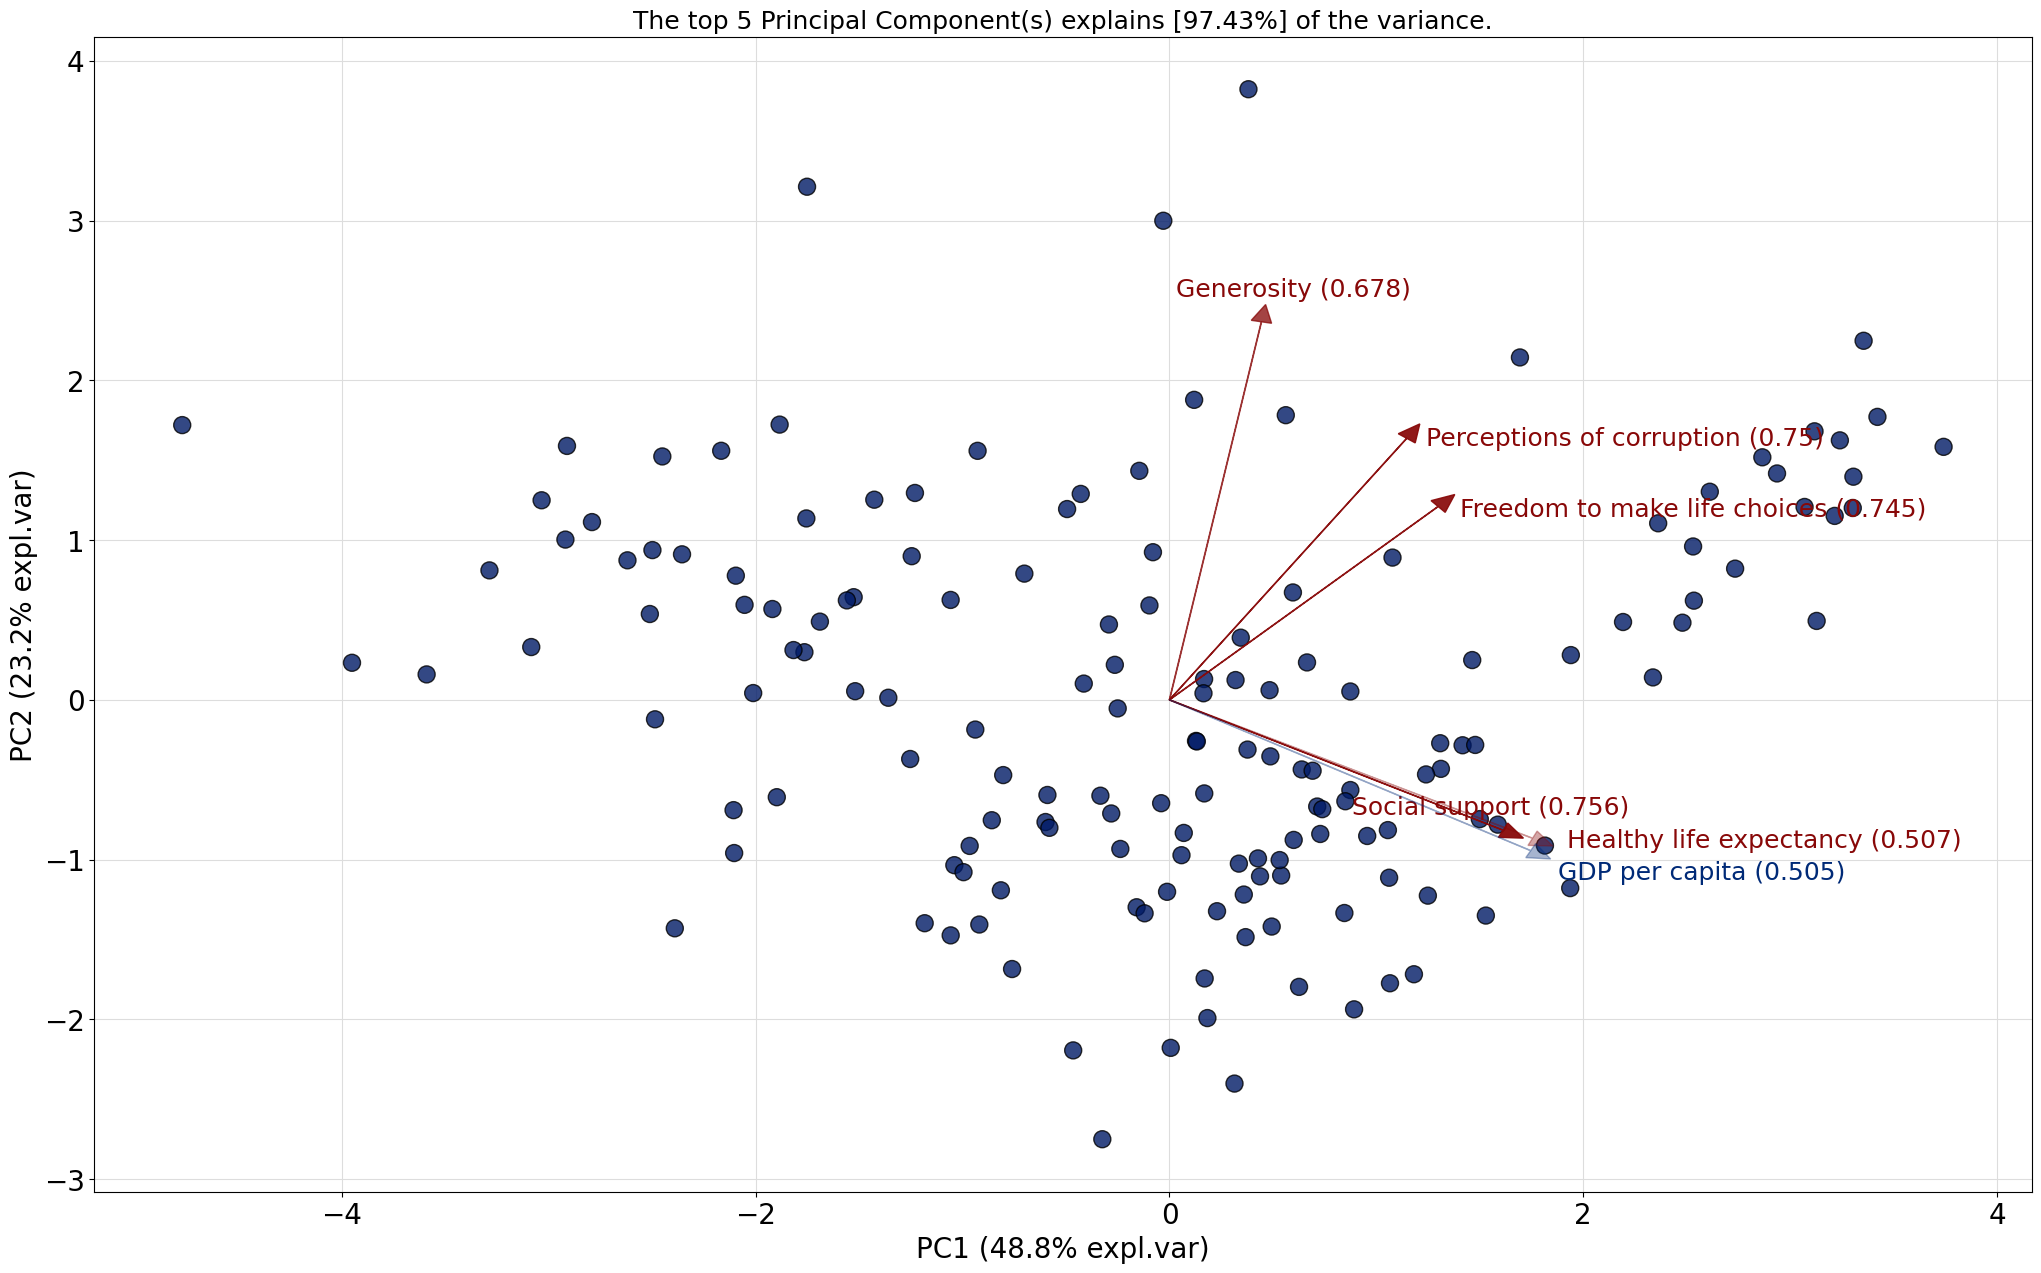

In [21]:
# Copy data
df = pd.read_csv("../datasets/happy.csv").copy()

# Row labels (countries)
row_labels = df["Country or region"]

# Target variable (NOT used in PCA)
y = df.pop("Score")

# Exclude non-PCA columns
X = df.drop(columns=["Country or region", "Overall rank"], errors="ignore")

# Keep only numeric columns
X = X.select_dtypes(include="number")
labels = X.columns

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initializing model
model = pca()

# Fit transform with labels
results = model.fit_transform(
    X,
    col_labels=labels,
    row_labels=row_labels
)

# Biplot
model.biplot()

